In [1]:
# plotting cross-species GO correlation
# © EMBL-European Bioinformatics Institute, 2025
# Yuyao Song <ysong@ebi.ac.uk>
# Mar 2025

In [5]:
library(tidyverse)
library(Seurat)
library(scGOclust)
library(stats)
library(pheatmap)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Att

In [4]:
corr = readRDS("cele_hvul_corr.rds")

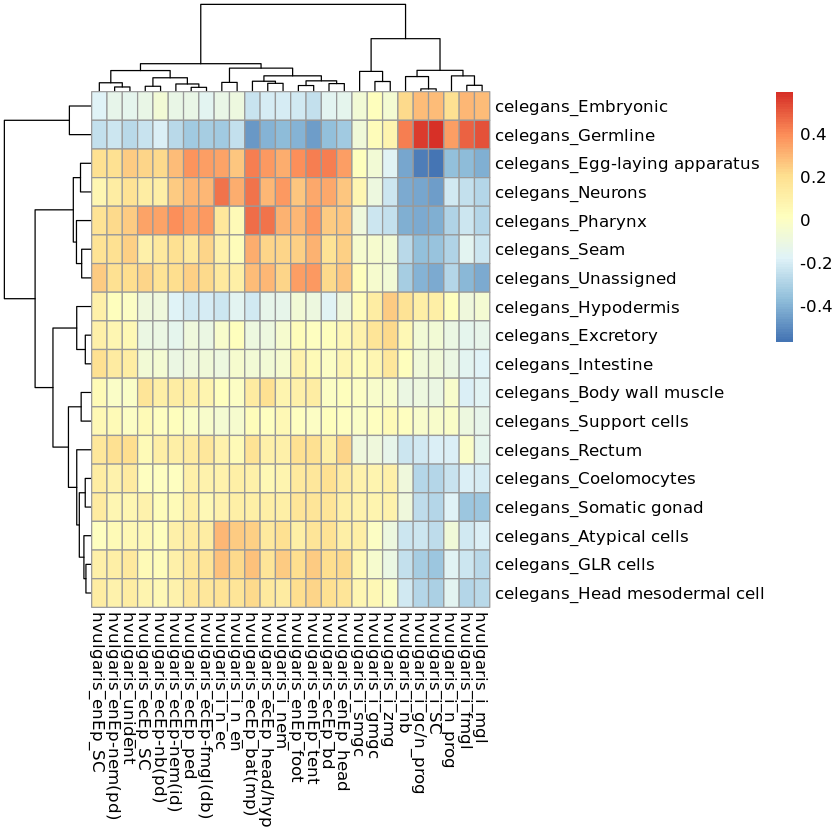

In [7]:
pheatmap(corr)

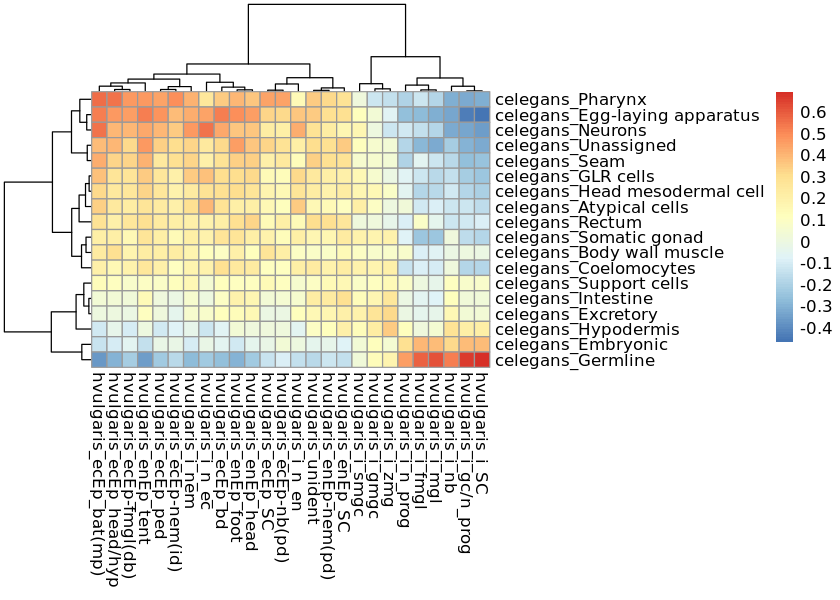

In [30]:
fig_no_scale = scGOclust::plotCellTypeCorrHeatmap(corr_matrix = seurat_cluster_corr)

In [31]:
saveRDS(fig_no_scale, "cele_hvul_corr_heatmap_no_scailing.rds")

In [32]:
ggsave(filename = "cele_hvul_corr_heatmap_no_scailing.png", plot = fig_no_scale, height = 5, width = 7, units = 'in', dpi = 300)
ggsave(filename = "cele_hvul_corr_heatmap_no_scailing.pdf", plot = fig_no_scale, height = 5, width = 7, units = 'in')

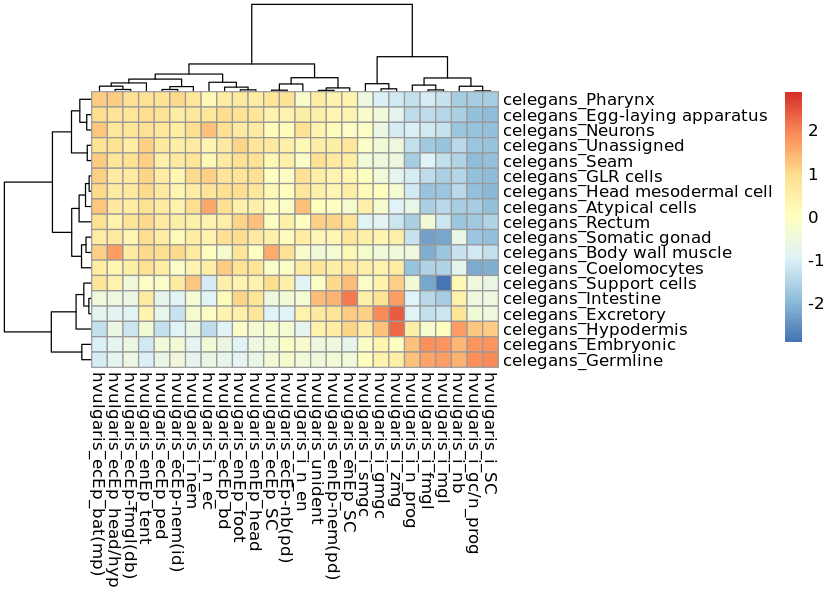

In [33]:
fig_row_scale = scGOclust::plotCellTypeCorrHeatmap(corr_matrix = seurat_cluster_corr, scale='row')

In [34]:
ggsave(filename = "cele_hvul_corr_heatmap_row_scaled.png", plot = fig_row_scale, height = 5, width = 7, units = 'in', dpi = 300)
ggsave(filename = "cele_hvul_corr_heatmap_row_scaled.pdf", plot = fig_row_scale, height = 5, width = 7, units = 'in')

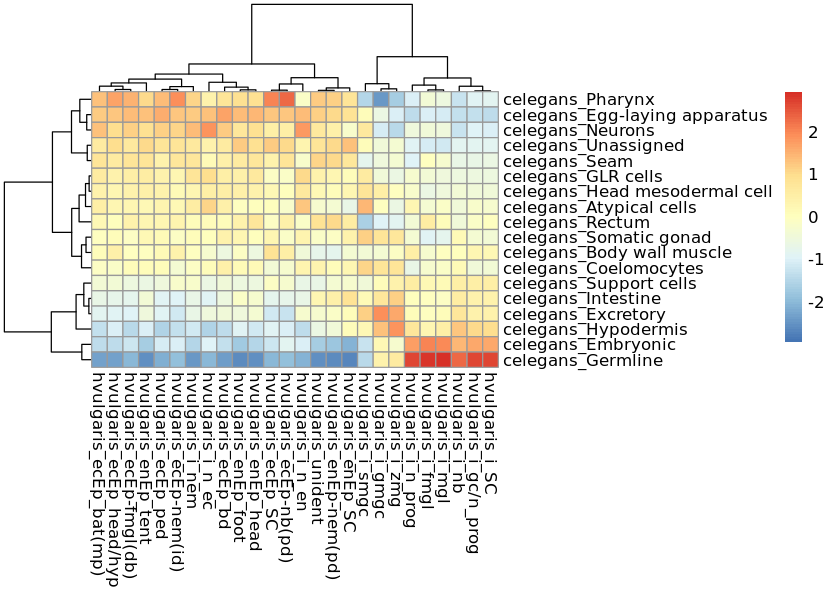

In [35]:
fig_col_scale = scGOclust::plotCellTypeCorrHeatmap(corr_matrix = seurat_cluster_corr , scale='column')

In [36]:
ggsave(filename = "cele_hvul_corr_heatmap_col_scaled.png", plot = fig_col_scale, height = 5, width = 7, units = 'in', dpi = 300)
ggsave(filename = "cele_hvul_corr_heatmap_col_scaled.pdf", plot = fig_col_scale, height = 5, width = 7, units = 'in')

In [2]:
cele_go_analyzed = readRDS("cele_go_analyzed.rds")

In [3]:
hvul_go_analyzed = readRDS("hydra_go_analyzed.rds")

In [7]:
shared_go = read_csv("shared_go_analysis/cele_hvul_shared_go_signif.csv")

Rows: 11561 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): gene, cluster_sp1, marker_type_sp1, cluster_sp2, marker_type_sp2, ...
dbl (12): p_val_sp1, avg_log2FC_sp1, pct.1_sp1, pct.2_sp1, p_val_adj_sp1, pc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### obtain the last common ancestor of shared GO terms using the tool ontologyIndex
#### scOntoMatch is a helper package for translating GO ids and GO names, because ontologyIndex uses GO ids but usually GO names are more comprehensible
#### this is to return GO terms with the highest possible granularity

In [6]:
library(scOntoMatch)
library(ontologyIndex)

In [3]:
ont = ontologyIndex::get_OBO('/nfs/research/irene/ysong/DATA/GO_ontology/go-basic.obo', propagate_relationships = c('is_a', 'part_of'), )

In [5]:
corr = readRDS("cele_hvul_corr.rds")

In [6]:
head(corr)

,hvulgaris_ecEp_bat(mp),hvulgaris_ecEp_bd,hvulgaris_ecEp_head/hyp,hvulgaris_ecEp_ped,hvulgaris_ecEp_SC,hvulgaris_ecEp-fmgl(db),hvulgaris_ecEp-nb(pd),hvulgaris_ecEp-nem(id),hvulgaris_enEp_foot,hvulgaris_enEp_head,⋯,hvulgaris_i_mgl,hvulgaris_i_n_ec,hvulgaris_i_n_en,hvulgaris_i_n_prog,hvulgaris_i_nb,hvulgaris_i_nem,hvulgaris_i_SC,hvulgaris_i_smgc,hvulgaris_i_zmg,hvulgaris_unident
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
celegans_Atypical cells,0.24473896,0.18758469,0.15299939,0.14276008,0.055516835,0.1286540,0.02404254,0.100429778,0.11222355,0.11566598,⋯,-0.1863472,0.29929847,0.2500709908,-0.06658282,-0.22173163,0.20074433,-0.25504225,0.112257687,-0.09696233,0.05171845
celegans_Body wall muscle,0.13945487,-0.00199367,0.19525769,0.11670170,0.176061306,0.0822093,0.11357526,0.126507410,0.10323897,0.01942525,⋯,-0.1602380,0.02495232,-0.0005605187,-0.02871477,-0.10581191,0.08473853,-0.11100207,-0.006085855,-0.02180059,-0.01634234
celegans_Coelomocytes,0.10020019,0.19256938,0.06200012,0.10368709,0.004023865,0.0950392,0.01451201,0.006858861,0.14827253,0.13507970,⋯,-0.1939979,0.09578804,0.1152015476,-0.23512821,-0.08792793,0.07431836,-0.27763363,0.091065329,0.10456583,0.13464951
celegans_Egg-laying apparatus,0.43015987,0.42779202,0.36988313,0.38467984,0.236219360,0.3528812,0.21927102,0.289030353,0.38859898,0.35933562,⋯,-0.4041028,0.34933625,0.2676069587,-0.35970388,-0.43588309,0.32369777,-0.56570959,0.025170606,-0.16473478,0.25409310
celegans_Embryonic,-0.23342295,-0.15544773,-0.19780841,-0.12206204,-0.117818201,-0.1501382,-0.05630321,-0.115484181,-0.21668606,-0.14139971,⋯,0.2939596,-0.11407917,-0.0923407664,0.19749017,0.22342267,-0.19730182,0.29449428,-0.065293054,-0.04839110,-0.14565885
celegans_Excretory,-0.09315221,0.01846598,-0.10051598,-0.08595952,-0.109678203,-0.1072008,-0.10865644,-0.140027930,0.02733207,0.05586927,⋯,-0.1323641,-0.02623179,0.0224906174,-0.10448075,0.06027914,-0.04182886,-0.06528609,0.095333739,0.22323306,0.05217853


In [13]:
top_corr = corr %>% rownames_to_column("cell_type_1") %>%  pivot_longer(cols = -c(cell_type_1), names_to = 'cell_type_2', values_to = 'corr_val') %>% 
arrange(desc(corr_val)) %>% head(n=20)


head(top_corr)

cell_type_1,cell_type_2,corr_val
<chr>,<chr>,<dbl>
celegans_Germline,hvulgaris_i_SC,0.5967377
celegans_Germline,hvulgaris_i_gc/n_prog,0.5666684
celegans_Germline,hvulgaris_i_mgl,0.5181104
celegans_Germline,hvulgaris_i_fmgl,0.4880554
celegans_Pharynx,hvulgaris_ecEp_bat(mp),0.4607571
celegans_Neurons,hvulgaris_i_n_ec,0.4547154


In [2]:
## for each pair of cell types between species that are top positively correlated, obtain the LCA of shared up-regulated GO terms
## this is done through a loop and get the "minimal_set" of all shared up-regulated GO terms
## which removes the parent term of the child term is present
## therefore its the highest granularity GO results


In [14]:
all = data.frame()

for(i in seq(1, nrow(top_corr))){
    
    cell_type_sp1 = gsub("celegans_", "", top_corr[i, 'cell_type_1'])
    cell_type_sp2 = gsub("hvulgaris_", "", top_corr[i, 'cell_type_2'])

    fc_mt_go_list =  shared_go %>% filter(cluster_sp1 == cell_type_sp1) %>% 
    filter(cluster_sp2 == cell_type_sp2)  %>% 
    mutate(avg_logfc_both = (avg_log2FC_sp1 + avg_log2FC_sp2) / 2) %>% 
    arrange(desc(avg_logfc_both))

    
    go_terms = getOntologyId(ont = ont, onto_name = unique(fc_mt_go_list$gene))
    go_terms_minimal = minimal_set(ontology = ont, terms = names(go_terms))
    
    go_terms_minimal_name = getOntologyName(ont = ont, onto_id = go_terms_minimal)
    
    add = fc_mt_go_list %>% filter(gene %in% go_terms_minimal_name) %>% arrange(desc(avg_logfc_both)) %>% head(n=20)
    
    all = rbind(all, add)
    
    
}




In [15]:
head(all)

gene,p_val_sp1,avg_log2FC_sp1,pct.1_sp1,pct.2_sp1,p_val_adj_sp1,cluster_sp1,marker_type_sp1,pct_intersect_sp1,p_val_sp2,avg_log2FC_sp2,pct.1_sp2,pct.2_sp2,p_val_adj_sp2,cluster_sp2,marker_type_sp2,pct_intersect_sp2,species_1,species_2,avg_logfc_both
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
mitotic sister chromatid segregation,0,0.7548827,0.998,0.966,0,Germline,sig_up,0.2909091,0,0.3175268,1.000,0.987,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.5362048
negative regulation of chromosome organization,0,0.6638759,0.986,0.864,0,Germline,sig_up,0.2909091,0,0.3994569,1.000,0.991,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.5316664
rRNA modification,0,0.4320040,0.908,0.724,0,Germline,sig_up,0.2909091,0,0.5305823,0.999,0.873,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.4812931
"negative regulation of gene expression, epigenetic",0,0.5449592,0.986,0.888,0,Germline,sig_up,0.2909091,0,0.3654985,0.999,0.978,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.4552289
ribonucleoprotein complex localization,0,0.3833694,0.997,0.996,0,Germline,sig_up,0.2909091,0,0.4718434,1.000,0.997,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.4276064
DNA biosynthetic process,0,0.4431647,0.970,0.859,0,Germline,sig_up,0.2909091,0,0.4067689,0.997,0.931,0,i_SC,sig_up,0.4933921,celegans,hvulgaris,0.4249668


In [16]:
all %>% write_csv("top_20_skim_GO_terms.csv")

In [3]:
# example of bar plot showing shared up-regulated GO BP terms between two species cell types

In [7]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [8]:
library(RColorBrewer)

In [9]:
library(cowplot)

In [10]:
options(repr.plot.width = 12, repr.plot.height = 4)

In [11]:
library(scales)
library(viridis)

In [32]:
sp1_cell_type_now = 'Germline'
sp2_cell_type_now = 'i_mgl'

In [35]:
all %>% filter(cluster_sp1 == sp1_cell_type_now) %>% filter(cluster_sp2 == sp2_cell_type_now) %>% 
mutate(sp1_gene = factor(gene, levels = rev(gene))) %>% head()

gene,p_val_sp1,avg_log2FC_sp1,pct.1_sp1,pct.2_sp1,p_val_adj_sp1,cluster_sp1,marker_type_sp1,pct_intersect_sp1,p_val_sp2,avg_log2FC_sp2,pct.1_sp2,pct.2_sp2,p_val_adj_sp2,cluster_sp2,marker_type_sp2,pct_intersect_sp2,species_1,species_2,avg_logfc_both,sp1_gene
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
positive regulation of cell division,0,1.6096458,0.982,0.890,0,Germline,sig_up,0.3532468,2.342404e-134,0.2881470,1.000,0.965,3.034585e-130,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.9488964,positive regulation of cell division
positive regulation of cell cycle process,0,1.0108596,1.000,0.999,0,Germline,sig_up,0.3532468,5.892698e-199,0.3200143,1.000,1.000,7.633991e-195,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.6654370,positive regulation of cell cycle process
nucleosome assembly,0,0.3879261,0.961,0.870,0,Germline,sig_up,0.3532468,0.000000e+00,0.9394278,1.000,0.981,0.000000e+00,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.6636770,nucleosome assembly
meiosis I,0,0.6132751,0.978,0.789,0,Germline,sig_up,0.3532468,4.264249e-268,0.5500211,0.998,0.930,5.524335e-264,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.5816481,meiosis I
flagellated sperm motility,0,0.6180001,0.941,0.807,0,Germline,sig_up,0.3532468,1.880785e-159,0.4370687,1.000,0.988,2.436558e-155,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.5275344,flagellated sperm motility
DNA-templated DNA replication,0,0.3892238,0.976,0.899,0,Germline,sig_up,0.3532468,3.508576e-259,0.6186295,1.000,0.972,4.545360e-255,i_mgl,sig_up,0.5619835,celegans,hvulgaris,0.5039267,DNA-templated DNA replication


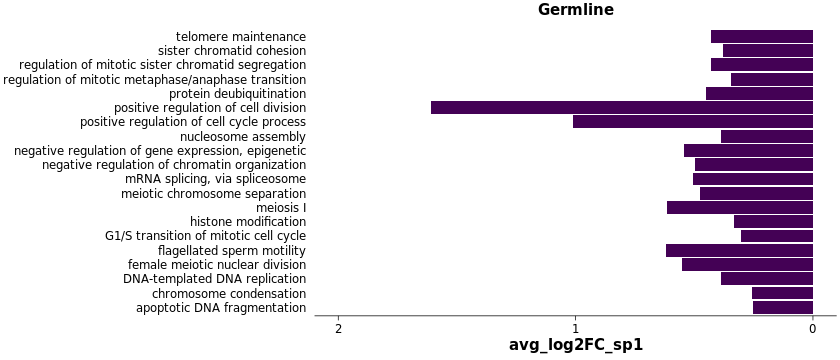

In [52]:
sp1_bar = all %>% filter(cluster_sp1 == sp1_cell_type_now) %>% filter(cluster_sp2 == sp2_cell_type_now) %>% 
mutate(sp1_gene = factor(gene, levels = rev(gene))) %>% 
ggplot(aes(x = stringr::str_wrap(sp1_gene, 60), y = avg_log2FC_sp1, fill= -log10(p_val_adj_sp1 + .Machine$double.xmin))) + geom_bar(stat = 'identity') + coord_flip() + 
scale_y_reverse(breaks = c( 2, 1, 0), limits = c(2, 0)) + common_0x +
labs(title = sp1_cell_type_now) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.title.y = element_blank(), ,
     axis.line.y = element_blank(), 
     axis.ticks.y = element_blank()) +
scale_fill_viridis(direction = -1, breaks = c(0, 100, 200, 300), limits = c(0, 308))

sp1_bar + theme(legend.position = 'none')

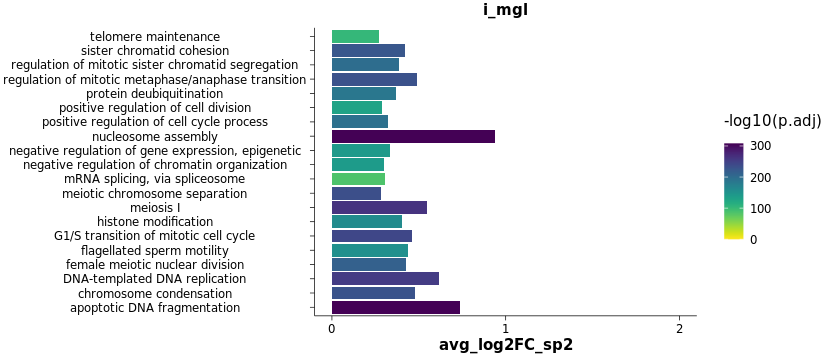

In [54]:
sp2_bar = all %>% filter(cluster_sp1 == sp1_cell_type_now) %>% filter(cluster_sp2 == sp2_cell_type_now) %>% 
mutate(sp1_gene = factor(gene, levels = rev(gene))) %>% 
ggplot(aes(x = stringr::str_wrap(sp1_gene, 60), y = avg_log2FC_sp2, fill = -log10(p_val_adj_sp2 + .Machine$double.xmin))) + geom_bar(stat = 'identity') + coord_flip() +
scale_y_continuous(breaks = c(0, 1, 2), limits = c(0, 2)) + common_0x +
labs(title = sp2_cell_type_now) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.y = element_text(hjust = 0.5)) +
theme(axis.title.y = element_blank()) +
scale_fill_viridis(direction = -1, breaks = c(0, 100, 200, 300), limits = c(0, 308), name= '-log10(p.adj)')

sp2_bar 

In [60]:
fig_germline_male = plot_grid(sp1_bar + theme(axis.text.y = element_blank(), legend.position = 'none'), 
          sp2_bar + theme(legend.position = 'none', axis.line.y = element_blank(), axis.ticks.y = element_blank()),
          align = 'h', axis = 'b', nrow = 1, rel_widths = c(0.45, 1))

In [71]:
options(repr.plot.width = 5, repr.plot.height = 2.5)

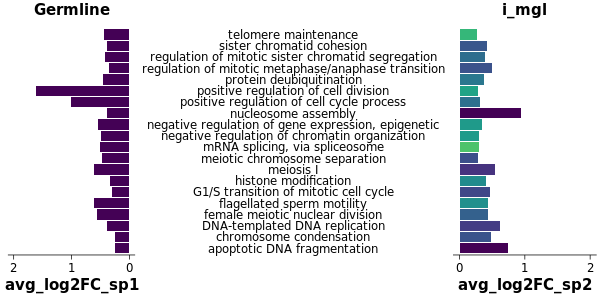

In [72]:
plot_grid(sp1_bar + theme(axis.text.y = element_blank(), legend.position = 'none'), 
          sp2_bar + theme(legend.position = 'none', axis.line.y = element_blank(), axis.ticks.y = element_blank()),
          align = 'h', axis = 'b', nrow = 1, rel_widths = c(0.3, 1))

In [76]:
pdf('cele_germline_hvul_male_germline.pdf', width = 5, height = 2.5)
plot_grid(sp1_bar + theme(axis.text.y = element_blank(), legend.position = 'none'), 
          sp2_bar + theme(legend.position = 'none', axis.line.y = element_blank(), axis.ticks.y = element_blank()),
          align = 'h', axis = 'b', nrow = 1, rel_widths = c(0.35, 1))
dev.off()


png 
  2

In [12]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nfs/research/icortes/ysong/anaconda3/envs/R4.3/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] RColorBrewer_1.1-3 gridExtra_2.3      gtable_0.3.4       ggpubr_0.6.0      
 [5] scales_1.3.0       viridis_0.6.4      viridisLite_0.4.2  ggrepel_0.9.5     
 [9] ggsci_3.0.0      